In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
balanced_results = pd.read_csv("../results/balanced.csv", index_col=0)
midimb_results = pd.read_csv("../results/mid_imb.csv", index_col=0)
extreme_results = pd.read_csv("../results/extreme_imb.csv", index_col=0)

In [3]:
filt = lambda x: x[(x["Score"] == "BIC") | (x["Score"] == "L2")]

balanced_results = filt(balanced_results)
midimb_results = filt(midimb_results)
extreme_results = filt(extreme_results)


In [8]:
def plot(results: pd.DataFrame, name: str):

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex = True)
    fig.suptitle(f'Higher Sample Performance on ({name}) 10-Node Networks')
    fig.set_size_inches(14.5, 10.5)
    sns.set_theme(style="whitegrid")
    sns.lineplot(
        data=results,
        x="Samples", y="PRECISION", hue="Score", style="Score",
        markers=True, dashes=False,markersize=10,ax=ax1
    )

    sns.set_theme(style="whitegrid")
    sns.lineplot(
        data=results,
        x="Samples", y="RECALL", hue="Score", style="Score",
        markers=True, dashes=False,markersize=10,ax=ax2
    )
    sns.lineplot(
        data=results,
        x="Samples", y="DAG PRECISION", hue="Score", style="Score",
        markers=True, dashes=False,markersize=10,ax=ax3
    )

    sns.set_theme(style="whitegrid")
    sns.lineplot(
        data=results,
        x="Samples", y="DAG RECALL", hue="Score", style="Score",
        markers=True, dashes=False,markersize=10,ax=ax4
    )

    ax1.set_ylabel("Skeleton Precision")
    ax2.set_ylabel("Skeleton Recall")
    ax3.set_ylabel("DAG Precision")
    ax4.set_ylabel("DAG Recall")

    ax1.set_xlim([1000, 5000])
    ax2.set_xlim([1000, 5000])
    ax3.set_xlim([1000, 5000])
    ax4.set_xlim([1000, 5000])

    ax1.set_ylim([0, 1])
    ax2.set_ylim([0, 1])
    ax3.set_ylim([0, 1])
    ax4.set_ylim([0, 1])


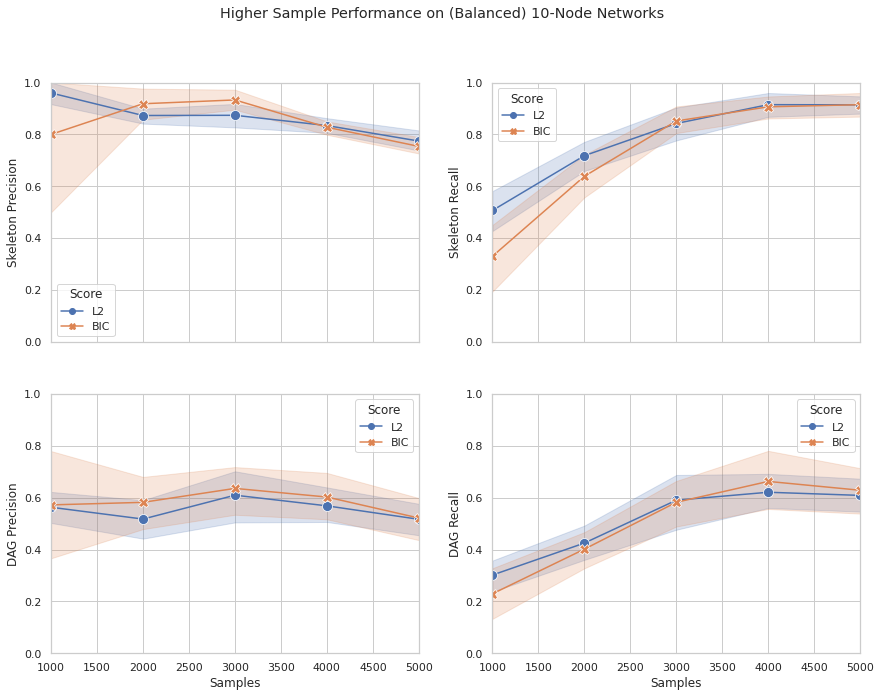

In [9]:
plot(balanced_results, "Balanced")

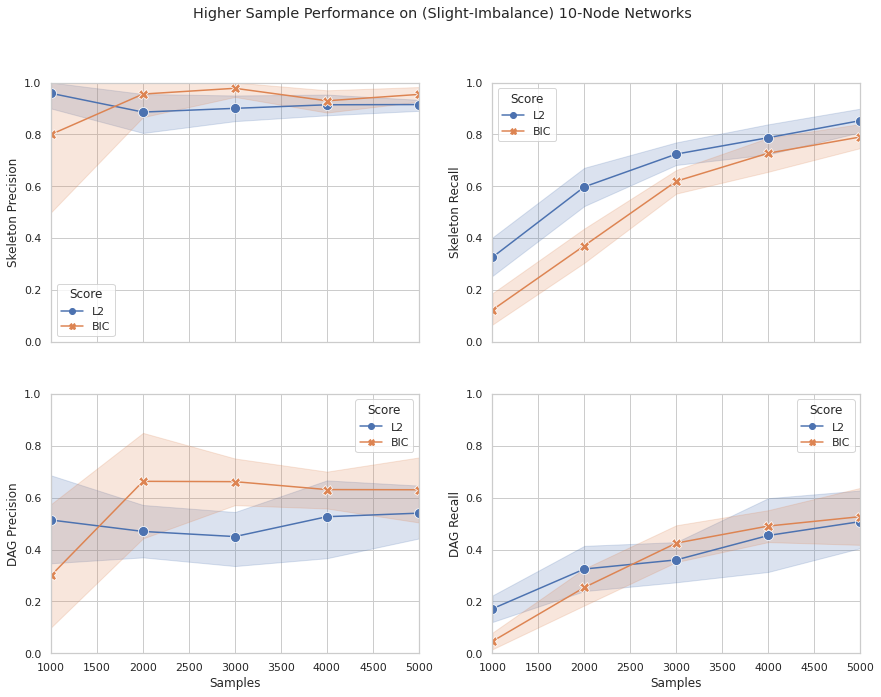

In [10]:
plot(midimb_results, "Slight-Imbalance")

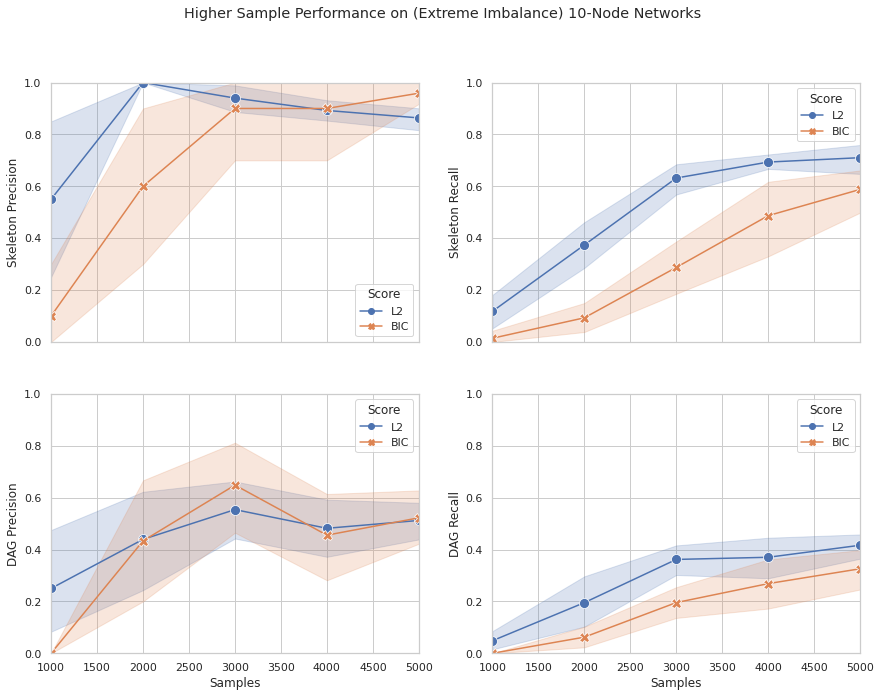

In [11]:
plot(extreme_results, "Extreme Imbalance")